In [1]:
import csv
import numpy as np
import matplotlib.pylab as plt

In [2]:
data_new=np.zeros((61,24,31))

In [3]:
flag=0
for i in range(31):
    d=[]
    #if i !=18:
    file='/home/iiitd/air_pollution/IMEI_atmos/data_process1/data_'+ str(i+1)+'.csv'
    with open(file,'rt')as f:
        data = csv.reader(f)
        for row in data:
            d.append(row)
    d=d[1:]
    d=np.asarray(d)

    data_new[:,:,flag]=d
    flag=flag+1


In [9]:
for i in range(61):
    for j in range(24):
        for k in range(30):
            if data_new[i,j,k]>400:
                data_new[i,j,k]=0
                

In [10]:
data_new.shape

(61, 24, 31)

# data_new[day,hour,location]

# Selecting the locations with 80% and more values

In [13]:
nz8=[]
flg=0

for i in range(31):
    data_1=data_new[:,:,i]
    nz=np.count_nonzero(data_1)
    tot=61*24
    
    if (nz/tot>0.8):
        flg=flg+1
        nz8.append(i)
        
print(nz8)

[0, 2, 3, 5, 6, 8, 9, 11, 23, 24, 25, 26]


# Eigen values for those locations

0
2
3
5
6
8
9
11
23
24
25


/home/iiitd/env/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


26


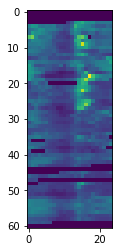

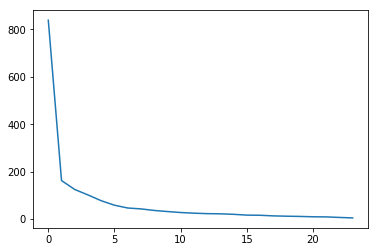

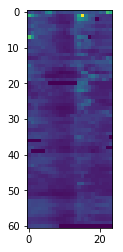

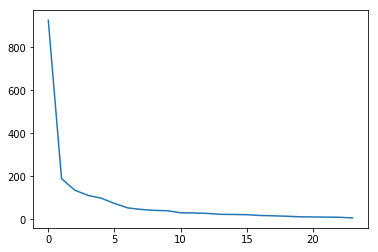

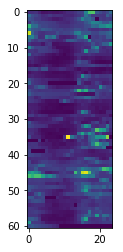

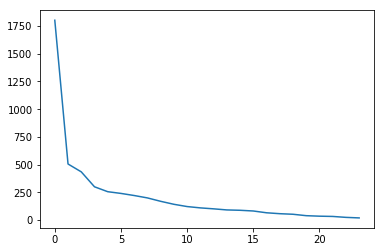

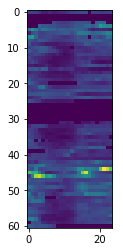

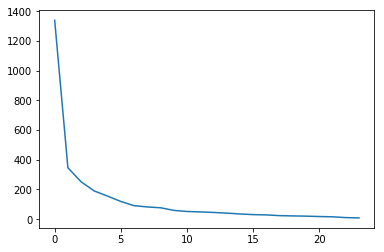

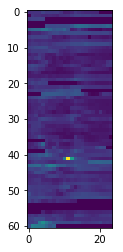

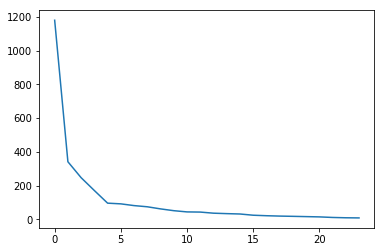

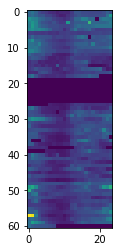

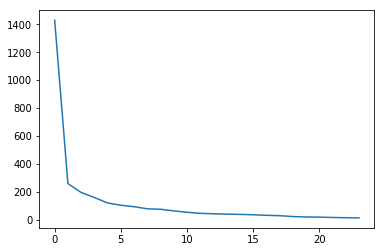

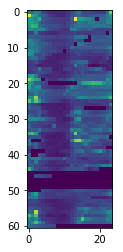

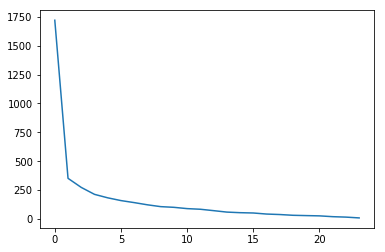

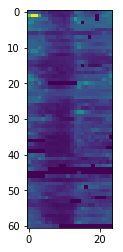

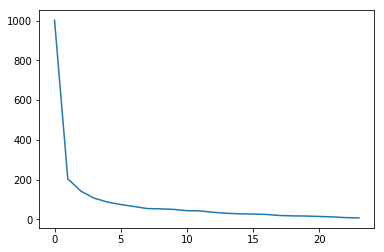

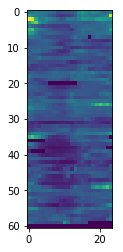

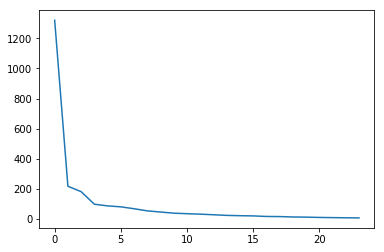

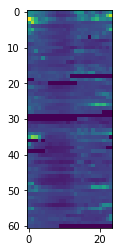

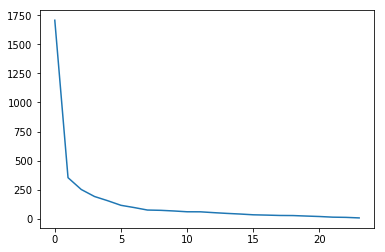

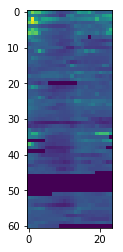

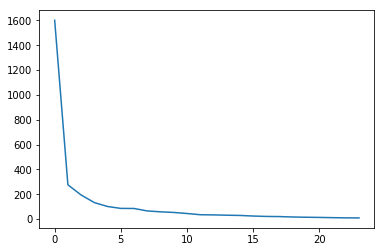

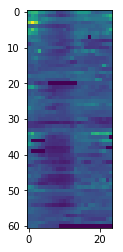

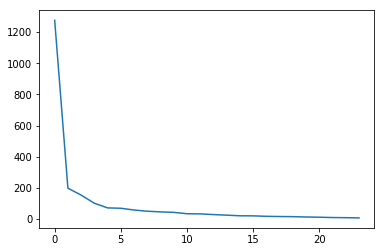

In [6]:
for i in range(len(nz8)):
    posit=nz8[i]
    print(posit)
    plt.figure()
    plt.imshow(data_new[:,:,posit])
    u, s, v = np.linalg.svd(data_new[:,:,posit])
    plt.figure()
    plt.plot(s)

In [7]:
traffic_data=[]
file='traffic_data.csv'
with open(file,'rt')as f:
    data = csv.reader(f)
    for row in data:
        row1 = [ float(x) for x in row]
        traffic_data.append(row1)

        

(67, 519)


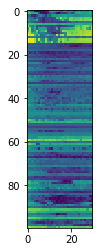

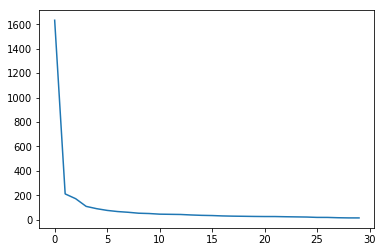

In [8]:
traffic_data=np.asarray(traffic_data)

        
print(traffic_data.shape)
traffic_data=np.transpose(traffic_data)
traffic=traffic_data[:100,0:30]
plt.figure()
plt.imshow(traffic)
u, s, v = np.linalg.svd(traffic)
plt.figure()
plt.plot(s)